In [4]:
#Importing what we need
#remember to run this cell twice

%matplotlib notebook
import matplotlib.pyplot as plt

import mygrad as mg
import numpy as np
import os

In [66]:
#load database
path_to_train = "fruits-360/Training"
path_to_test = "fruits-360/Test"
Classes = []
for file in os.listdir(path_to_train):
    Classes.append(file)
# print(Classes)
print(len(Classes))

132


In [40]:
from PIL import Image

im = Image.open("fruits-360/Training/Tomato 3/193_100.jpg") # Can be many different formats.
pix = np.array(im.getdata()).reshape(im.size[0], im.size[1], 3)
pix

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [64]:
for files in os.scandir(path_to_train):
    print(files)

<DirEntry 'Tomato 4'>
<DirEntry 'Apple Red Delicious'>
<DirEntry 'Tomato 3'>
<DirEntry 'Huckleberry'>
<DirEntry 'Blueberry'>
<DirEntry 'Pear Red'>
<DirEntry 'Banana Lady Finger'>
<DirEntry 'Melon Piel de Sapo'>
<DirEntry 'Pear'>
<DirEntry 'Strawberry'>
<DirEntry 'Nut Forest'>
<DirEntry 'Avocado'>
<DirEntry 'Tomato 2'>
<DirEntry 'Pomegranate'>
<DirEntry 'Dates'>
<DirEntry 'Carambula'>
<DirEntry 'Apple Red'>
<DirEntry 'Potato Red Washed'>
<DirEntry '.DS_Store'>
<DirEntry 'Granadilla'>
<DirEntry 'Kohlrabi'>
<DirEntry 'Tamarillo'>
<DirEntry 'Pepper Red'>
<DirEntry 'Fig'>
<DirEntry 'Ginger Root'>
<DirEntry 'Kiwi'>
<DirEntry 'Cherry Wax Yellow'>
<DirEntry 'Lemon'>
<DirEntry 'Guava'>
<DirEntry 'Apple Golden 2'>
<DirEntry 'Pear Stone'>
<DirEntry 'Cauliflower'>
<DirEntry 'Mandarine'>
<DirEntry 'Quince'>
<DirEntry 'Strawberry Wedge'>
<DirEntry 'Pear Monster'>
<DirEntry 'Raspberry'>
<DirEntry 'Pitahaya Red'>
<DirEntry 'Nut Pecan'>
<DirEntry 'Apple Golden 3'>
<DirEntry 'Redcurrant'>
<DirEntry 'Pep

In [65]:
len("fruits-360/Training/")

20

In [87]:
%%time
num_classes = len(Classes)   #should be 132
#Initializing a dictionary to take the name of a class 
Classes_to_index = {}
#Populate the dictionary in
for index, class_name in enumerate(Classes):
    Classes_to_index[class_name] = index

x_train_images = np.zeros((67692,100,100,3))
y_train = np.zeros((67692,))
x_test_images = np.zeros((22688,100,100,3))
y_test = np.zeros((22688,))


CPU times: user 835 µs, sys: 6.66 ms, total: 7.49 ms
Wall time: 6.98 ms


In [89]:
counter = 0
for subdir, dirs, files in os.walk(path_to_train):
#     print(subdir.name)
    for filename in files:
        filepath = subdir + os.sep + filename

        if filepath.endswith(".jpg"):
            if (counter % 1000 == 0):
                print(counter)
                print(label)
            im = Image.open(filepath)
            pix = np.array(im.getdata()).reshape(im.size[0], im.size[1], 3)
            x_train_images[counter] = pix
            label = subdir.split('/')[-1]
            y_train[counter] = Classes_to_index[label]
            counter += 1
y_train
counter
        

1000
Apple Red Delicious
2000
Tomato 3
3000
Blueberry
4000
Banana Lady Finger
5000
Pear
6000
Nut Forest
7000
Avocado
8000
Pomegranate
9000
Carambula
10000
Potato Red Washed
11000
Kohlrabi
12000
Pepper Red
13000
Ginger Root
14000
Cherry Wax Yellow
15000
Guava
16000
Pear Stone
17000
Cauliflower
18000
Strawberry Wedge
19000
Pear Monster
20000
Pitahaya Red
21000
Apple Golden 3
22000
Pepper Yellow
23000
Apple Golden
24000
Cucumber Ripe 2
25000
Cherry Rainier
26000
Maracuja
27000
Potato Sweet
28000
Cucumber Ripe
29000
Nectarine
30000
Cantaloupe 2
31000
Pepper Orange
32000
Watermelon
33000
Cantaloupe
34000
Cherry 2
35000
Rambutan
36000
Tomato Yellow
37000
Tomato Maroon
38000
Mango
39000
Apple Crimson Snow
40000
Corn Husk
41000
Mulberry
42000
Passion Fruit
43000
Beetroot
44000
Grape White 2
45000
Eggplant
46000
Corn
47000
Grape White 3
48000
Tomato Heart
49000
Plum 3
50000
Tomato not Ripened
51000
Peach 2
52000
Salak
53000
Banana
54000
Onion Red
55000
Apple Red Yellow 2
56000
Grape Blue
57000


IndexError: index 67692 is out of bounds for axis 0 with size 67692

In [93]:
y_train
len(y_train)

67692

In [97]:
counter = 0
for subdir, dirs, files in os.walk(path_to_test):
#     print(subdir.name)
    for filename in files:
        filepath = subdir + os.sep + filename

        if filepath.endswith(".jpg"):
            if (counter % 1000 == 0):
                print(counter)
                print(label)
            im = Image.open(filepath)
            pix = np.array(im.getdata()).reshape(im.size[0], im.size[1], 3)
            x_test_images[counter] = pix
            label = subdir.split('/')[-1]
            y_test[counter] = Classes_to_index[label]
            counter += 1
            if counter >= 22688:
                print("OH NO")
y_train

0
Granadilla
1000
Pear Red
2000
Nut Forest
3000
Apple Red
4000
Fig
5000
Apple Golden 2
6000
Strawberry Wedge
7000
Redcurrant
8000
Cucumber Ripe 2
9000
Potato Sweet
10000
Lychee
11000
Mangostan
12000
Apple Braeburn
13000
Apple Crimson Snow
14000
Apple Granny Smith
15000
Limes
16000
Apple Pink Lady
17000
Peach 2
18000
Physalis with Husk
19000
Pepino
20000
Walnut
21000
Tomato
22000
Kaki
OH NO


array([  0.,   0.,   0., ..., 131., 131., 131.])

In [74]:
np.shape(x_train_images)

(67692, 100, 100, 3)

In [100]:
x_train_images = x_train_images.reshape(67692,30000).astype(np.float32)
x_test_images = x_test_images.reshape(22688,30000).astype(np.float32)

In [106]:
print(x_train_images)
print(x_test_images)

[[254. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [252. 254. 249. ... 255. 255. 255.]
 [255. 255. 253. ... 255. 255. 255.]]
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [254. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


17.0

In [107]:
mean_train = np.mean(x_train_images)
mean_test = np.mean(x_test_images)
std_train = np.std(x_train_images)
std_test = np.std(x_test_images)
x_train_images -= mean_train 
x_train_images /= std_train
x_test_images -= mean_test 
x_test_images /= std_test

In [120]:
from mynn.optimizers.adam import Adam
from mynn.initializers.he_normal import he_normal
from mynn.activations.relu import relu
from mynn.losses.cross_entropy import softmax_cross_entropy
from mynn.layers.dense import dense


# Define your MyNN-`Model` class here. It should have:
# - an `__init__` method that initializes all of your layers
# - a `__call__` method that defines the model's "forward pass"
# - a `parameters` property that returns a tuple of all of your
#   model's learnable parameters (refer to the Tendrils-MyNN)
#   notebook for the syntax of defining a class-property)


class Model:
    def __init__(self, n1, n2, n3, num_classes):
        """
        Initializes a model with two hidden layers of size `n1` and `n2`
        respectively.
        
        Parameters
        ----------
        n1 : int
            The number of neurons in the first hidden layer

        n2 : int
            The number of neurons in the second hidden layer
        
        num_classes : int
            The number of classes predicted by the model"""
        # STUDENT CODE HERE
        self.dense1 = dense(30000, n1, weight_initializer = he_normal)
        self.dense2 = dense(n1, n2, weight_initializer = he_normal)
        self.dense3 = dense(n2, n3, weight_initializer = he_normal)
        self.dense4 = dense(n3, num_classes, weight_initializer = he_normal)
        
    def __call__(self, x):
        '''Passes data as input to our model, performing a "forward-pass".
        
        This allows us to conveniently initialize a model `m` and then send data through it
        to be classified by calling `m(x)`.
        
        Parameters
        ----------
        x : Union[numpy.ndarray, mygrad.Tensor], shape=(M, 2)
            A batch of data consisting of M pieces of data,
            each with a dimentionality of 2.
            
        Returns
        -------
        mygrad.Tensor, shape=(M, num_out)
            The model's prediction for each of the M pieces of data.
        '''
        
        # We pass our data through a dense layer, use the activation 
        # function relu and then pass it through our second dense layer,
        # then use the activation function relu and then pass it through
        # our third dense layer.
        # We don't have a second activation function because it happens
        # to be included in our loss function: softmax-crossentropy
        return self.dense4(relu(self.dense3(relu(self.dense2(relu(self.dense1(x)))))))
        
    @property
    def parameters(self):
        """ A convenience function for getting all the parameters of our model.
        
        This can be accessed as an attribute, via `model.parameters` 
        
        Returns
        -------
        Tuple[Tensor, ...]
            A tuple containing all of the learnable parameters for our model"""
        return self.dense1.parameters + self.dense2.parameters + self.dense3.parameters + self.dense4.parameters

In [ ]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

<IPython.core.display.Javascript object>


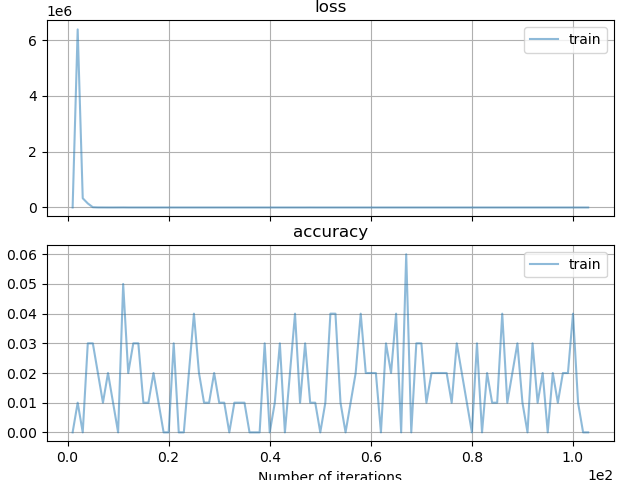

In [125]:
# Create a noggin plot, that keeps track of the metrics: "loss" and "accuracy"
# STUDENT CODE HERE
from noggin import create_plot
plotter, fig, ax = create_plot(metrics=["loss", "accuracy"])



In [126]:
# Set `batch_size = 100`: the number of predictions that we will make in each training step

# STUDENT CODE HERE
batch_size = 1000
# We will train for 10 epochs; you can change this if you'd like.
# You will likely want to train for much longer than this
for epoch_cnt in range(2):
    
    # Create the indices to index into each image of your training data
    # e.g. `array([0, 1, ..., 9999])`, and then shuffle those indices.
    # We will use this to draw random batches of data
    # STUDENT CODE HERE
    indices = np.arange(0, 50000)
    np.random.shuffle(indices) 
    for batch_cnt in range(0, len(x_train_images) // batch_size):
        # Index into `x_train` to get your batch of M images.
        # Make sure that this is a randomly-sampled batch
        # STUDENT CODE HERE
        
        batch = x_train_images[indices[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]]
        
        # compute the predictions for this batch by calling on model
        # STUDENT CODE HERE
        
        prediction = model(batch)

        # compute the true (a.k.a desired) values for this batch: 
        # STUDENT CODE HERE
        
        truth = y_train_int[indices[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]]

        # compute the loss associated with our predictions(use softmax_cross_entropy)
        # STUDENT CODE HERE
        
        loss = softmax_cross_entropy(prediction, truth)
        
        # compute the accuracy between the prediction and the truth 
        # STUDENT CODE HERE
        
        if isinstance(prediction, mg.Tensor):
            prediction = prediction.data
        acc = np.mean(np.argmax(prediction, axis=1) == truth)

        # back-propagate through your computational graph through your loss
        # STUDENT CODE HERE
        
        loss.backward()
        
        # execute gradient-descent by calling step() of optim
        # STUDENT CODE HERE
        
        optim.step()
        
        # null your gradients
        # STUDENT CODE HERE
        
        loss.null_gradients()

        plotter.set_train_batch({"loss" : loss.item(),
                                 "accuracy" : acc},
                                 batch_size=batch_size)
    
    # After each epoch we will evaluate how well our model is performing
    # on data from cifar10 *that it has never "seen" before*. This is our
    # "test" data. The measured accuracy of our model here is our best 
    # estimate for how our model will perform in the real world 
    # (on 32x32 RGB images of things in this class)
    test_idxs = np.arange(len(x_test))
    
    for batch_cnt in range(0, len(x_test)//batch_size):
        batch_indices = test_idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        
        batch = x_test_images[batch_indices]
        truth = y_test_int[batch_indices]
        
        # Get your model's predictions for this test-batch
        # and measure the test-accuracy for this test-batch
        # STUDENT CODE HERE
        
        prediction = model(batch)
        if isinstance(prediction, mg.Tensor):
            prediction = prediction.data
        acc = np.mean(np.argmax(prediction, axis=1) == truth)
        
        # pass your test-accuracy here; we used the name `test_accuracy`
        plotter.set_test_batch({"accuracy" : acc}, batch_size=batch_size)
    plotter.set_test_epoch()

KeyboardInterrupt: 

In [ ]:
labels = datasets.load_cifar10.labels  # tuple of cifar-10 labels

index = np.random.randint(0, len(img_test))  # pick a random test-image index

true_label_index = label_test[index]
true_label = labels[true_label_index]

prediction = model(x_test[index:index + 1])  # you must pass in a shape-(1, 3072) array 
predicted_label_index = np.argmax(prediction.data, axis=1).item()  # largest score indicates the prediction
predicted_label = labels[predicted_label_index]


fig, ax = plt.subplots()

# matplotlib wants shape-(H, W, C) images, with unsigned 8bit pixel values
img = img_test[index].transpose(1,2,0).astype('uint8')

ax.imshow(img)
ax.set_title(f"Predicted: {predicted_label}\nTruth: {true_label}");